# K-Nearest Neighbours

## Intuition

Imagine a scenario where we have labelled data in two categories, where the category is assumed to be dependent on two continuous independent variables. If a new unlabelled data point is added, how should it be classified? A very simple algorithm to do this is K-nearest neighbours (KNN).

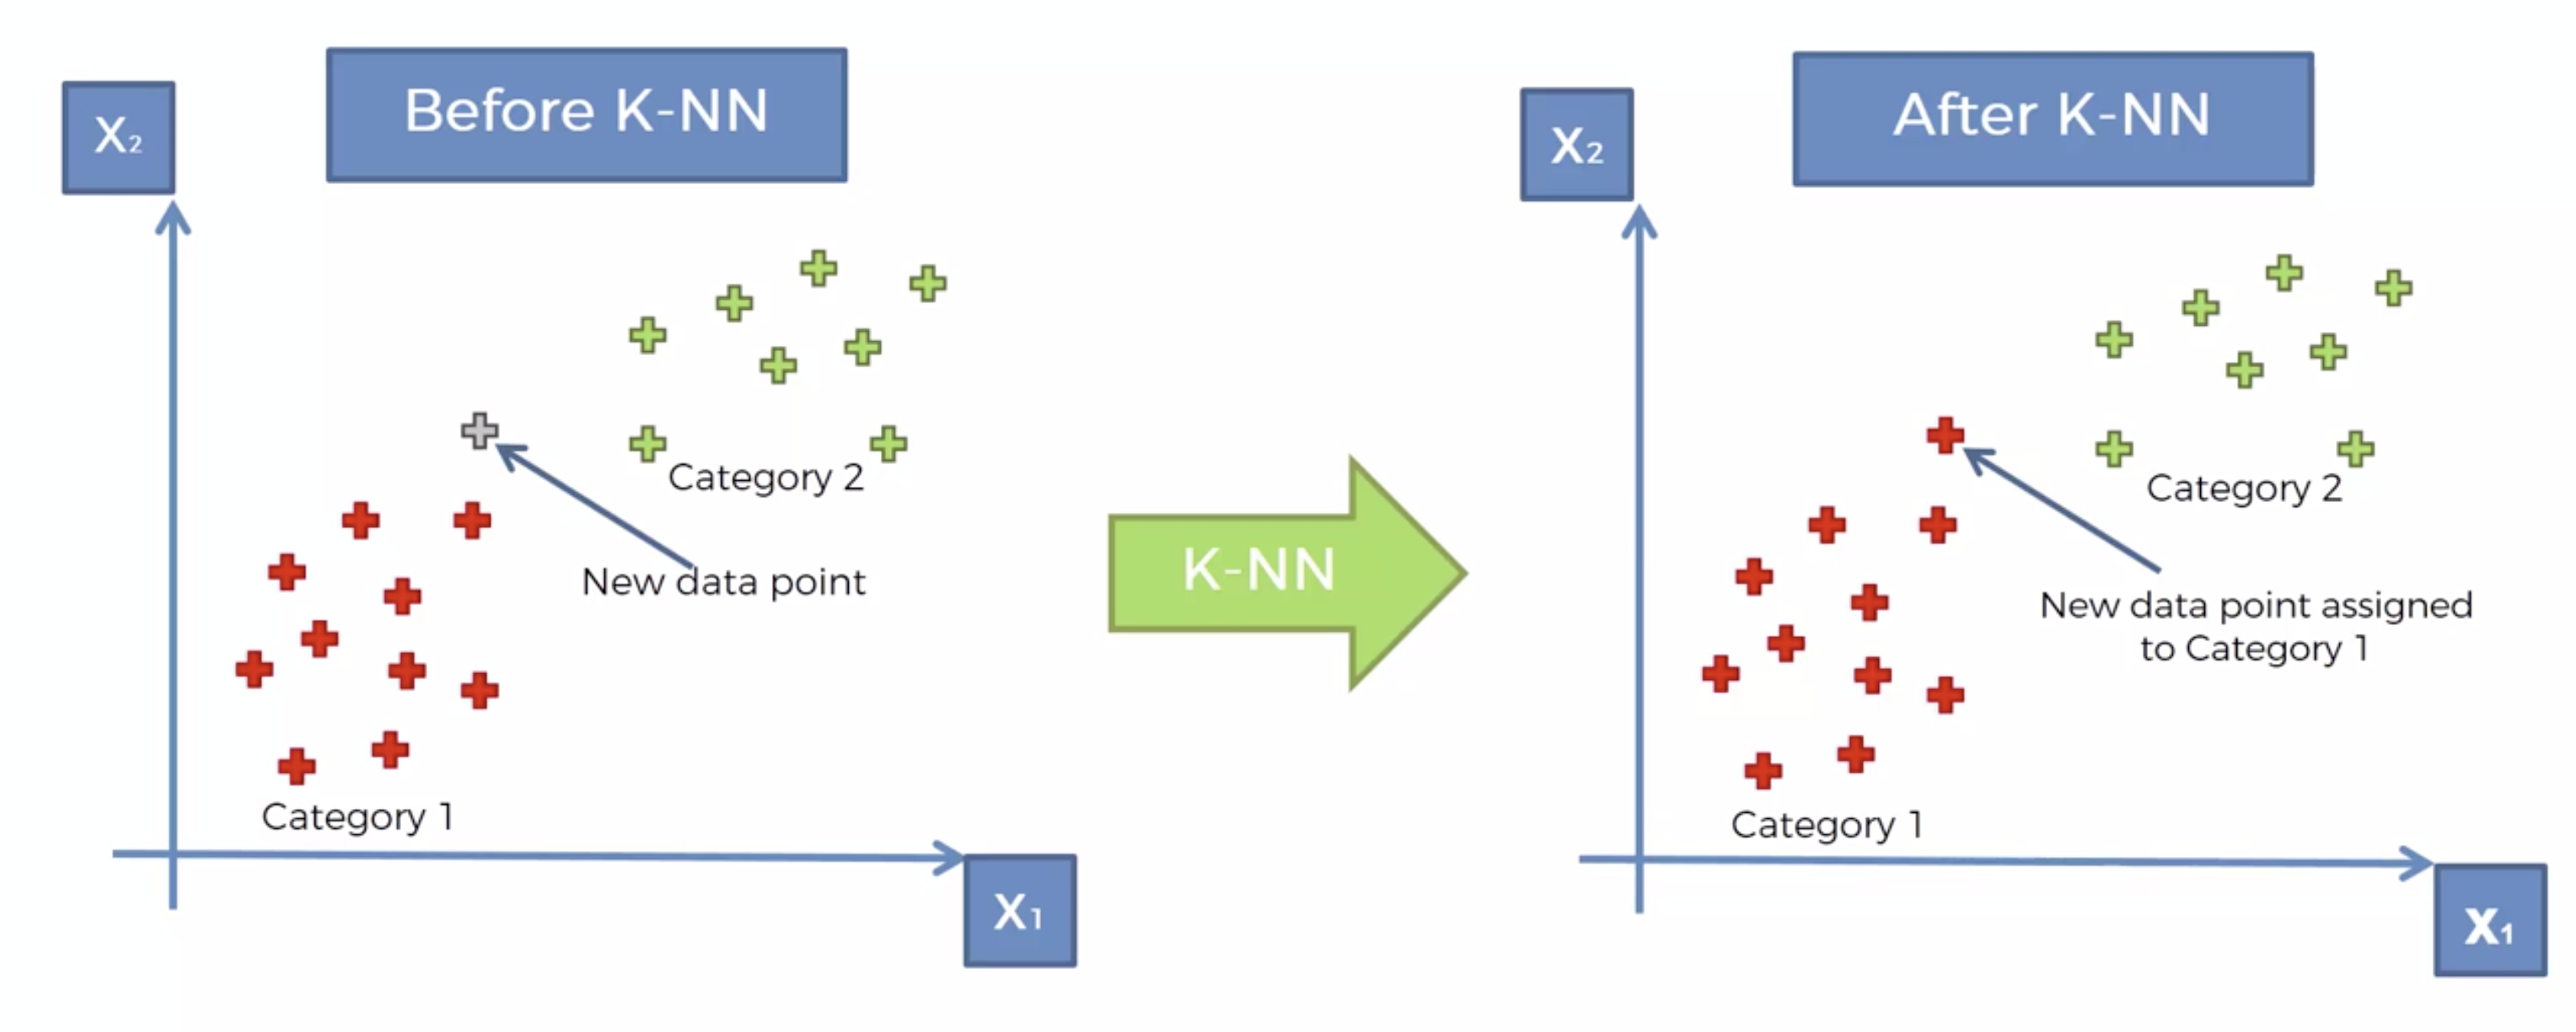

In [1]:
from IPython.display import display, Image
display(Image(filename='knn.png'))

<img src="knn.png" alt="knn">

from IPython.display import display, Image
display(Image(filename='imgs/token-object-01.png'))


### Steps

1.   Choose the number $K$ of neighbours (e.g. $5$)
2.   Take the $K$-nearest neighbours of the new data point, according to the (e.g. Euclidean) distance
3.   Among these $K$ neighbours, count the number of data points in each category
4.   Assign the new data point to the category where you counted the most neighbours

### Euclidean distance

There are a number of different distances one can choose to calculate between the data points, but the most common is just the Euclidean distance.

![knn_distance.png](knn_distance.png)

The Euclidean distance between $P_1$ and $P_2$ is given by

\begin{equation}
    R(P_1, P_2) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}.
\end{equation}

### Step 1 - Choose the number $K$ of neighbours (e.g. $5$)

![knn_1.png](knn_1.png)

### Step 2 - Take the $K$-nearest neighbours of the new data point, according to the (e.g. Euclidean) distance

![knn_2.png](knn_2.png)

### Step 3 - Among these $K$ neighbours, count the number of data points in each category

![knn_3.png](knn_3.png)

### Step 4 - Assign the new data point to the category where you counted the most neighbours

![knn_4.png](knn_4.png)

## Code

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting classifier to the Training set

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)

### Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

Note that the results are much more accurate than we found for logistic regression.

### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


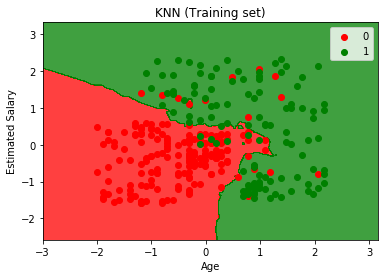

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

So, the boundary looks more like a country line than the straight line we found in Logistic Regression, it is not a linear classifier. It captures many more of the training set in the correct regions than the previous algorithm. Note that the default KNN set-upo aims to limit ovefitting, so it doesn't match the training data too perfectly.

### Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


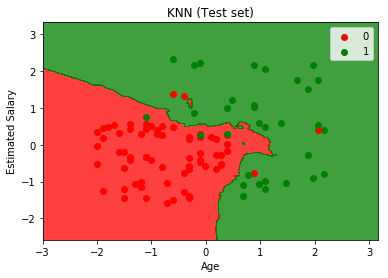

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

As we can see, the KNN fits the test data very well. We can easily count the FN and FP from the confusion matrix.